In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#import the dataset
df = pd.read_csv('C:/Users/dell/Downloads/IRIS.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
Id = list(range(150))
Id

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

In [5]:
df['Id'] = Id
df

,sepal_length,sepal_width,petal_length,petal_width,species,Id
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5.0,3.6,1.4,0.2,Iris-setosa,4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,145
146,6.3,2.5,5.0,1.9,Iris-virginica,146
147,6.5,3.0,5.2,2.0,Iris-virginica,147
148,6.2,3.4,5.4,2.3,Iris-virginica,148


In [6]:
first_column = df.pop('Id')

In [7]:
df.insert(0, 'Id', first_column)
df

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
x1 = df[df.columns[0:3]]
x1

,Id,sepal_length,sepal_width
0,0,5.1,3.5
1,1,4.9,3.0
2,2,4.7,3.2
3,3,4.6,3.1
4,4,5.0,3.6
...,...,...,...
145,145,6.7,3.0
146,146,6.3,2.5
147,147,6.5,3.0
148,148,6.2,3.4


In [9]:
x1.sort_values(['sepal_length']).reset_index(drop=True)[:13]

,Id,sepal_length,sepal_width
0,13,4.3,3.0
1,42,4.4,3.2
2,38,4.4,3.0
3,8,4.4,2.9
4,41,4.5,2.3
5,22,4.6,3.6
6,3,4.6,3.1
7,6,4.6,3.4
8,47,4.6,3.2
9,2,4.7,3.2


In [10]:
user_input = int(input("Please enter Id : "))
user_index = x1[x1['Id']==user_input].index[0]
x = x1['sepal_length'][user_index]
y = x1['sepal_width'][user_index]

Please enter Id : 3


In [11]:
x1['Distance'] = 0
for i in range(x1.shape[0]):
    x1['Distance'][i] = ((x1['sepal_length'][i] - x)**2 + (x1['sepal_width'][i] - y)**2)**0.5

C:\Users\dell\AppData\Local\Temp\ipykernel_26828\3145744133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['Distance'] = 0
C:\Users\dell\AppData\Local\Temp\ipykernel_26828\3145744133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['Distance'][i] = ((x1['sepal_length'][i] - x)**2 + (x1['sepal_width'][i] - y)**2)**0.5


In [12]:
x1

,Id,sepal_length,sepal_width,Distance
0,0,5.1,3.5,0.640312
1,1,4.9,3.0,0.316228
2,2,4.7,3.2,0.141421
3,3,4.6,3.1,0.000000
4,4,5.0,3.6,0.640312
...,...,...,...,...
145,145,6.7,3.0,2.102380
146,146,6.3,2.5,1.802776
147,147,6.5,3.0,1.902630
148,148,6.2,3.4,1.627882


In [103]:
x2 = x1.sort_values(['Distance']).reset_index(drop = True)[:11]
x2

,Id,sepal_length,sepal_width,Distance
0,3,4.6,3.1,0.000000
1,47,4.6,3.2,0.100000
2,29,4.7,3.2,0.141421
3,2,4.7,3.2,0.141421
4,30,4.8,3.1,0.200000
5,42,4.4,3.2,0.223607
6,38,4.4,3.0,0.223607
7,45,4.8,3.0,0.223607
8,12,4.8,3.0,0.223607
9,8,4.4,2.9,0.282843


In [104]:
x = x2.iloc[:,1]
x

0     4.6
1     4.6
2     4.7
3     4.7
4     4.8
5     4.4
6     4.4
7     4.8
8     4.8
9     4.4
10    4.6
Name: sepal_length, dtype: float64

In [105]:
y = x2.iloc[:,2]
y

0     3.1
1     3.2
2     3.2
3     3.2
4     3.1
5     3.2
6     3.0
7     3.0
8     3.0
9     2.9
10    3.4
Name: sepal_width, dtype: float64

In [106]:
n = x2.iloc[:,0]
n

0      3
1     47
2     29
3      2
4     30
5     42
6     38
7     45
8     12
9      8
10     6
Name: Id, dtype: int64

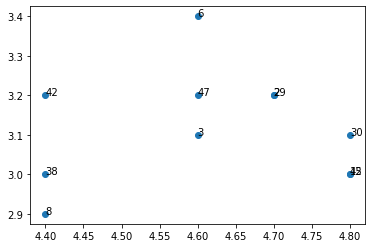

In [107]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [87]:
x = x1.iloc[:,1]
x

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [62]:
y = x1.iloc[:,2]
y

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [63]:
n = x1.iloc[:,0]
n

0        0
1        1
2        2
3        3
4        4
      ... 
145    145
146    146
147    147
148    148
149    149
Name: Id, Length: 150, dtype: int64

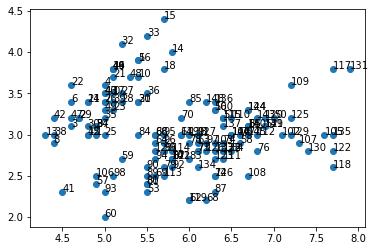

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [67]:
x1 = df[df.columns[0:3]]
x1

,Id,sepal_length,sepal_width
0,0,5.1,3.5
1,1,4.9,3.0
2,2,4.7,3.2
3,3,4.6,3.1
4,4,5.0,3.6
...,...,...,...
145,145,6.7,3.0
146,146,6.3,2.5
147,147,6.5,3.0
148,148,6.2,3.4


In [76]:
x1.dtypes

Id                int64
sepal_length    float64
sepal_width     float64
Coordinates      object
xy               object
dtype: object

In [78]:
x1[x1['Id']==4].index[0]

4

In [73]:
x1['xy'] = x1.sepal_length.astype(str) +","+ x1.sepal_width.astype(str)
print(x1)

      Id  sepal_length  sepal_width Coordinates       xy
0      0           5.1          3.5     5.1,3.5  5.1,3.5
1      1           4.9          3.0     4.9,3.0  4.9,3.0
2      2           4.7          3.2     4.7,3.2  4.7,3.2
3      3           4.6          3.1     4.6,3.1  4.6,3.1
4      4           5.0          3.6     5.0,3.6  5.0,3.6
..   ...           ...          ...         ...      ...
145  145           6.7          3.0     6.7,3.0  6.7,3.0
146  146           6.3          2.5     6.3,2.5  6.3,2.5
147  147           6.5          3.0     6.5,3.0  6.5,3.0
148  148           6.2          3.4     6.2,3.4  6.2,3.4
149  149           5.9          3.0     5.9,3.0  5.9,3.0

[150 rows x 5 columns]


C:\Users\dell\AppData\Local\Temp\ipykernel_22372\3465232034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['xy'] = x1.sepal_length.astype(str) +","+ x1.sepal_width.astype(str)


In [74]:
def euclidean(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5

ref_xy = x1.loc[0, 'xy']

distance = x1['xy'].apply(lambda xy: xy and euclidean(xy, ref_xy))
distance.head()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [31]:
#x = x1.iloc[:1]
#xdata['xy']

In [33]:
def euclidean(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5

ref_xy = df.loc[0, 'x1']

distance = x1.apply(lambda xy: xy and euclidean(xy, ref_xy))
distance.head()

KeyError: 'x1'

In [47]:
from scipy.spatial.distance import pdist
import itertools

pdist(x1.values, 'euclid')

array([1.13578167, 2.06155281, 3.06757233, ..., 1.11803399, 2.0880613 ,
       1.11803399])

In [49]:

d = pd.DataFrame(itertools.combinations(df.index, 2), columns=['i','j'])
d['dist'] = pdist(x1, 'euclid')
d['dist']

0        1.135782
1        2.061553
2        3.067572
3        4.002499
4        5.024938
           ...   
11170    2.195450
11171    3.067572
11172    1.118034
11173    2.088061
11174    1.118034
Name: dist, Length: 11175, dtype: float64

In [26]:
import math

Px = 3 
Py = 7
  

Qx = -5
Qy = -9
  

eDistance = math.dist([Px, Py], [Qx, Qy])
print(eDistance)

17.88854381999832


In [27]:
# point a
x1 = 2
y1 = 3
# point b
x2 = 5
y2 = 7

distance = ((x1 - x2)**2 + (y1 - y2)**2)**0.5

print("Distance between points ({}, {}) and ({}, {}) is {}".format(x1,y1,x2,y2,distance))

Distance between points (2, 3) and (5, 7) is 5.0
